# Obtain training data 

Steps to obtain data for Yolo V5 

1. Obtain data. 
2. Make bounding boxes for data  - https://www.makesense.ai/ #label order is important
 - name your file - initails_number . So that we don't have same data 
 - Ex: in_01.jpg  / in_02.jpg
3. Place labels for train and testing in one folder
4. Place images for train and testing in another folder
5. Zip them 
6. Drag and drop to upload to Google Colab
7. Unzip folder of images

In [ ]:
####### Here is Step 7 ########
!unzip -q class_data.zip -d .

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

1. Git clone repo 
2. Download a .yaml file 
3. Convert .yaml file to this (https://github.com/irfan017/cv_workshop/blob/08627f819f0c278e0b8bff6be85aed5b01c2dbb7/custom_data.yaml ) 
4. Upload the .yaml file into Google Colab
5. Put .yaml doc in the same directory as other .yaml files


In [ ]:
####### Here is Step 1 #######

!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.2-159-gd669a74 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 37.6/78.2 GB disk)


In [ ]:
pwd

'/content/yolov5/yolov5'

# Training

1. Train the Yolo v5 model on the custom data 
2. Test the model. Model can be tested on video or image

In [ ]:
# batch - number of images that will be run before weights are updated
# epoch - number of times model run over whole dataset
# cache - This command caches the entire dataset in the first epoch so it may be reused again instantly


# Train YOLOv5s on custom data 
!python train.py --img 640 --batch 16 --epochs 50 --data custom.yaml  --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=custom.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-159-gd669a74 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, d

## Local Logging

All results are logged by default to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc. 
Training results are automatically logged to [Tensorboard](https://www.tensorflow.org/tensorboard) and [CSV](https://github.com/ultralytics/yolov5/pull/4148) as `results.csv`


In [ ]:
# start Tensorboard 
# Lauch after you have started training 
# logs save in the folder runs 
# Tensorboard  (optional)
%reload_ext tensorboard
%tensorboard --logdir runs/train

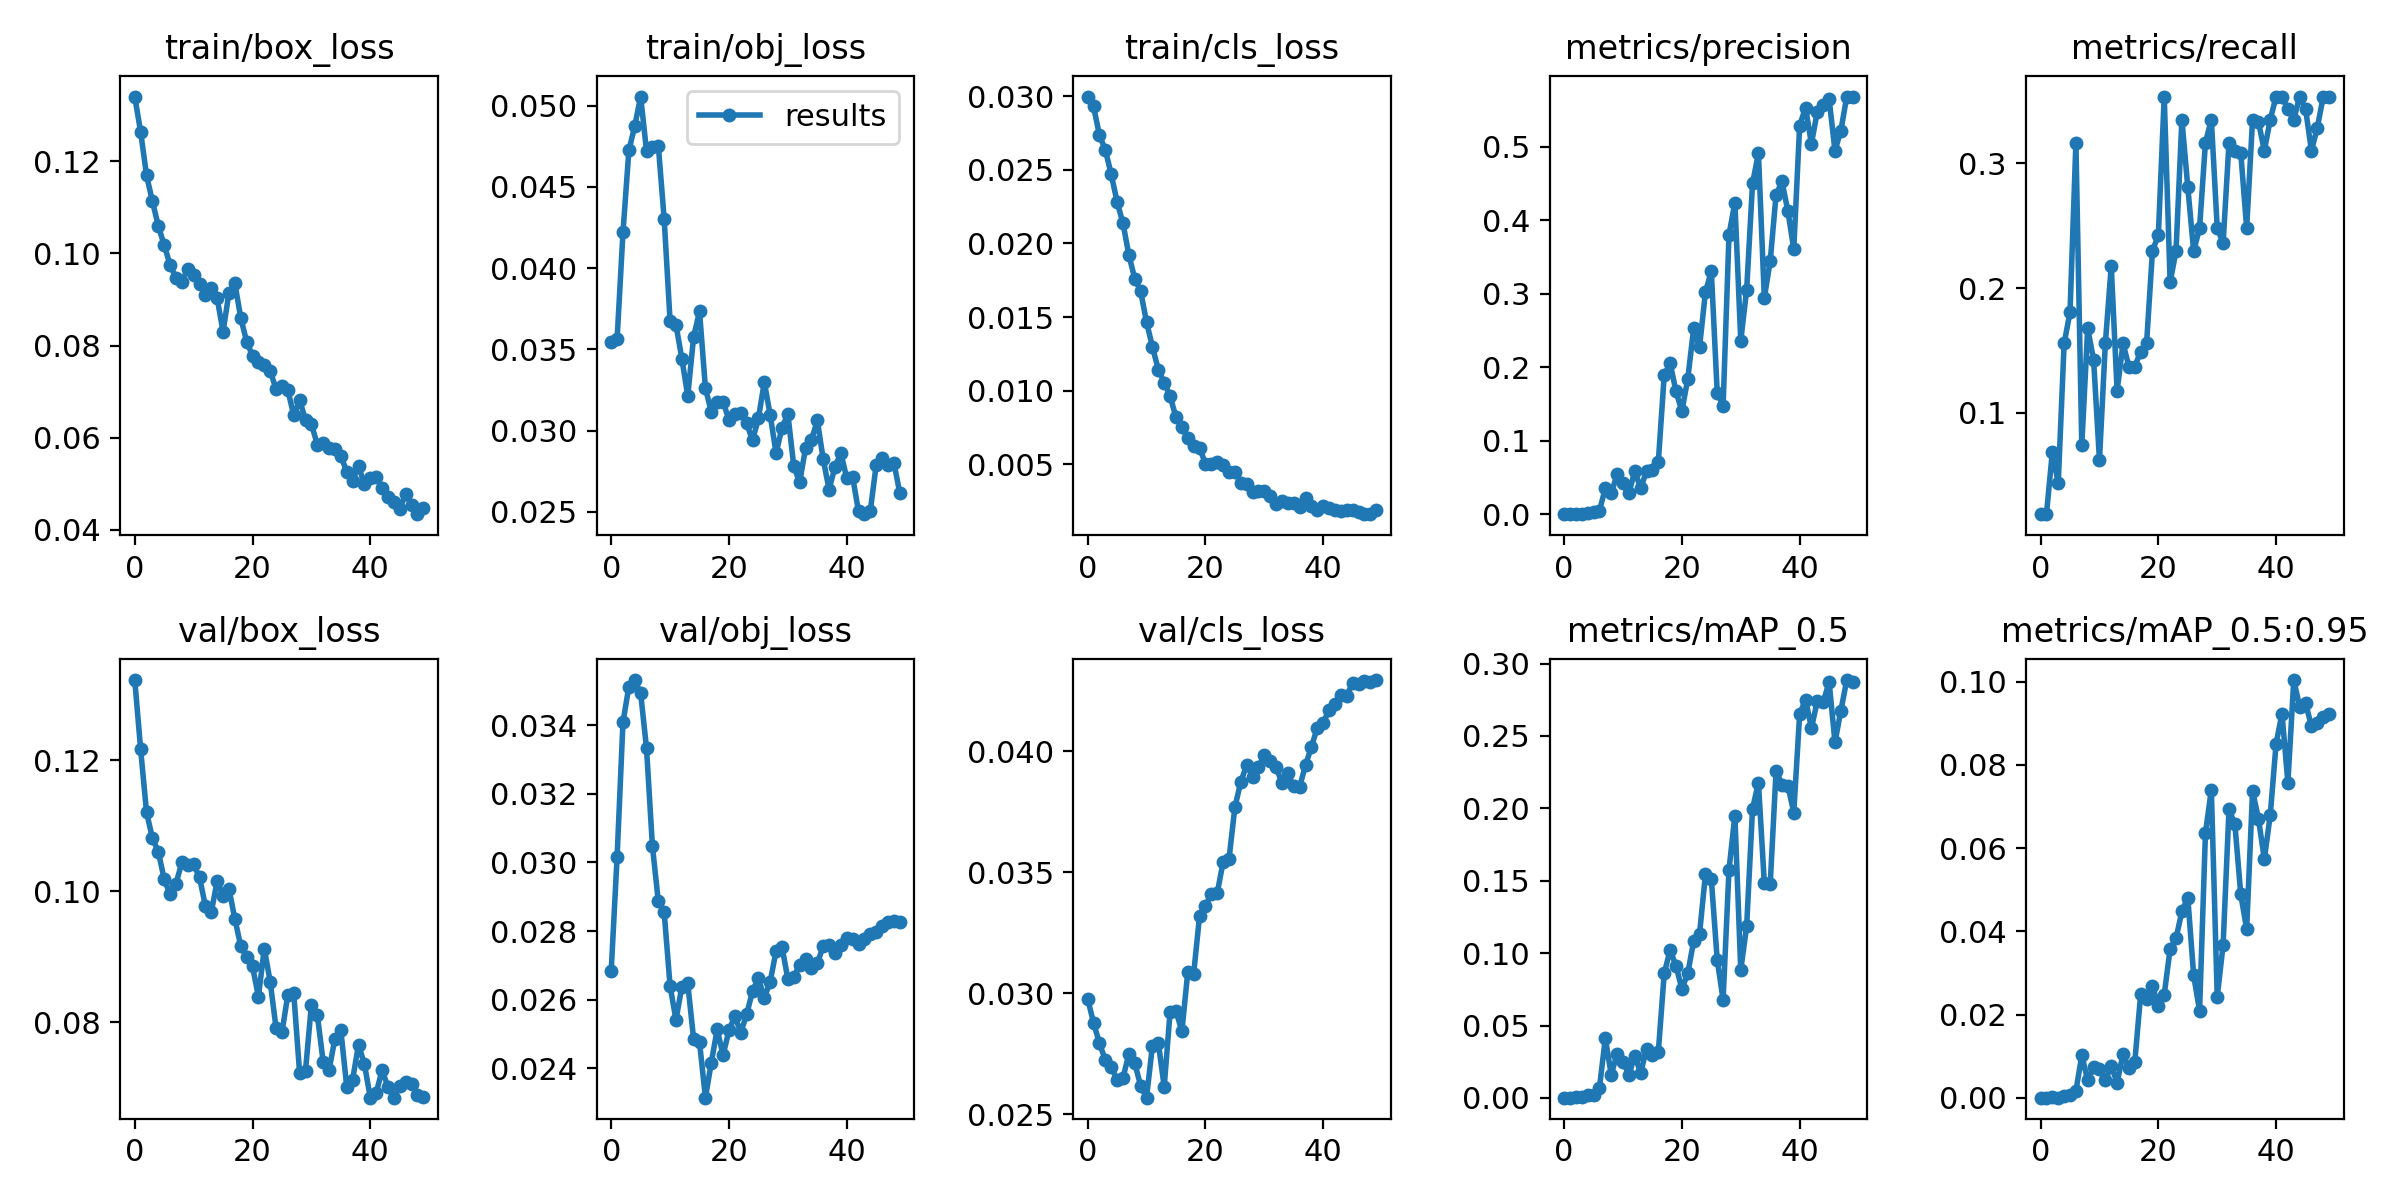

In [ ]:
# Visualize using graphs 

from utils.plots import plot_results 
plot_results('/content/yolov5/runs/train/exp3/results.csv')  # plot 'results.csv' as 'results.png'
# the .png is saved in the same folder as the results.csv
display.Image(filename='runs/train/exp3/results.png', width=600)

# Check Results of training 

# Testing 
- Test the model with a new image 
- Try to save cropped image


In [ ]:
!python detect.py --weights runs/train/exp3/weights/best.pt --img 640 --conf 0.3 --source ../img1.jpg

detect: weights=['runs/train/exp3/weights/best.pt'], source=../img1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-159-gd669a74 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/img1.jpg: 384x640 2 eyes, 1 mouth, 11.8ms
Speed: 0.4ms pre-process, 11.8ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2




# Saving model 
- You can save the model by copying the model weights 
- You can also use the previously trained model weights and retrain it with new data . 



In [ ]:
# Download the model weights  
# runs/train/exp/weights/best.pt

- Try loading the model in another notebook and test it . Does it work ?

# Reference :
https://youtu.be/GRtgLlwxpc4 